Task 1

<function matplotlib.pyplot.show(close=None, block=None)>

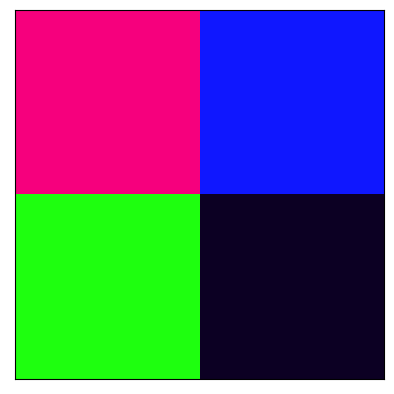

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = np.zeros((50,50,3),np.uint8)
image1[:,:] = (125,0,246)
image2 = np.zeros((50,50,3),np.uint8)
image2[:,:] = (255,23,15)
image3 = np.zeros((50,50,3),np.uint8)
image3[:,:] = (15,255,30)
image4 = np.zeros((50,50,3),np.uint8)
image4[:,:] = (35,0,12)

row1 = np.hstack((image1,image2))
row2 = np.hstack((image3,image4))
finalImage = np.vstack((row1,row2))
finalImage = cv2.cvtColor(finalImage,cv2.COLOR_BGR2RGB)

plt.imshow(finalImage)
plt.xticks([])
plt.yticks([])
plt.show

Task 2

In [1]:
import cv2
from cv2 import ROTATE_90_CLOCKWISE
from cv2 import COLOR_BGR2GRAY
from cv2 import COLOR_BGR2HSV
import numpy as np

capture = cv2.VideoCapture("http://192.168.0.5:4747/video")
frameWidth = int(capture.get(3))
frameHeight = int(capture.get(4))
frameSize = (frameWidth,frameHeight)
FPS = int(capture.get(5))

key = 'z'
lastKey = 'z'

while True :
    check, frame = capture.read()
    readkey = cv2.waitKey(20)
    if readkey != -1 :
        key = readkey
        cv2.destroyAllWindows()
    if  key == ord('q') or key == ord('Q') :
        break
    elif key == ord('r') or key == ord('R') :#rotate frame
        frame = cv2.rotate(frame,ROTATE_90_CLOCKWISE)
    elif key == ord('c') or key == ord('C') :#save frame
        cv2.imwrite("Resources/Capture.jpg",frame)   
    elif (key == ord('s') or key == ord('s')) and (lastKey != ord('s') or lastKey != ord('S')) :#start save video
        outputVideo = cv2.VideoWriter('Resources/CaptureVideo.avi', cv2.VideoWriter_fourcc('M','J','P','G'), FPS, frameSize)
    elif (key == ord('s') or key == ord('S')) and (lastKey == ord('s') or lastKey == ord('S') ) :#save video
        outputVideo.write(frame)
    elif (key != ord('s') or key != ord('S')) and (lastKey == ord('s') or lastKey == ord('S')) :#end save video
        outputVideo.release()
    elif key == ord('g') or key == ord('G') :#convert grayscale
        frame = cv2.cvtColor(frame,COLOR_BGR2GRAY)
    elif key == ord('h') or key == ord('H')  :#convertHSV
        frame = cv2.cvtColor(frame,COLOR_BGR2HSV)
    elif key == ord('x') or key == ord('X') :#show all
        rotatedFrame = cv2.rotate(frame,ROTATE_90_CLOCKWISE)
        cv2.imshow("Video2",rotatedFrame)
        imageGray = cv2.cvtColor(frame,COLOR_BGR2GRAY)
        cv2.imshow("Video3",imageGray)
        imageHSV = cv2.cvtColor(frame,COLOR_BGR2HSV)
        cv2.imshow("Video4",imageHSV)
    #show original only z case is implicit
    cv2.imshow("Video",frame)
    lastKey = key
    
capture.release()
cv2.destroyAllWindows()


error: OpenCV(4.6.0) C:\Users\cf\AppData\Local\Temp\pip-install-rnaycmgy\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


Task 3

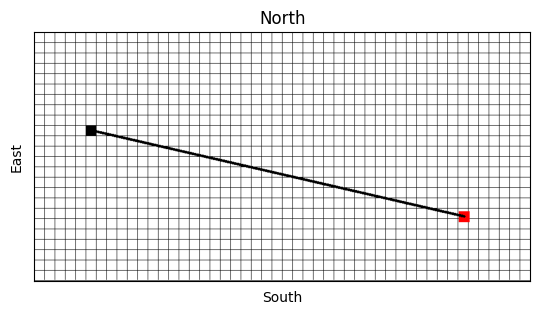

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

#draw map
Map = np.zeros((457,912,3),np.uint8)
Map[:,:] = (255,255,255)
counter = 0 
while(counter<457) :
    cv2.line(Map,(0,counter),(912,counter),(0,0,0),1)
    cv2.line(Map,(counter,0),(counter,454),(0,0,0),1)
    cv2.line(Map,(counter+456,0),(counter+456,454),(0,0,0),1)
    counter += 19
cv2.rectangle(Map,(95,171),(114,190),(0,0,0),-1)

# Maths explnation:
# first the distace is calculated using distance = speed * time
# then distance*cos(angle) is the change in x dimension
# distance*sin(angle) is the change in y dimension 
# then the two changes are added to the original point to get the final point 

#calculate and draw line and end point
angle = float(input("Input angle in degree:"))-90
speed = float(input("Input speed in m/s:"))
time = float(input("Input time taken in hours:"))
distance = time*3.6*speed
Ychange = int(distance*math.cos(math.radians(angle))*9.5)#9.5 is the ratio of pixels per km
Xchange = int(distance*math.sin(math.radians(angle))*9.5)

cv2.rectangle(Map,(95+Ychange,171+Xchange),(114+Ychange,190+Xchange),(0,0,255),-1)
cv2.line(Map,(105,180),(105+Ychange,180+Xchange),(0,0,0),3)

#draw and output
Map = cv2.cvtColor(Map,cv2.COLOR_BGR2RGB)
plt.imshow(Map)
plt.xlabel("South")
plt.ylabel("East")
plt.title("North")
plt.xticks([])
plt.yticks([])
plt.show()


Task 4

In [15]:
import cv2
import numpy as np


def mouseClick(event,x,y,flags,parameters) :
    global canvas
    global lastX
    global lastY
    if event == cv2.EVENT_LBUTTONDBLCLK :#draw circle
        canvas = cv2.circle(canvas,(x,y),10,(255),-1)
        lastX = x
        lastY = y
    if event == cv2.EVENT_RBUTTONDOWN :#erase last circle
        canvas = cv2.circle(canvas,(lastX,lastY),10,(0),-1)
    if event == cv2.EVENT_RBUTTONDBLCLK :#erase all circles
        canvas[:,:] = (0)

lastX = 0
lastY = 0 
canvas = np.zeros((500,500,1),np.uint8)
while True :
    cv2.imshow("Drawing App",canvas)
    cv2.setMouseCallback('Drawing App', mouseClick)
    if(cv2.waitKey(20) == ord('q')) :
        cv2.destroyAllWindows()
        break



Task 5

In [7]:
import cv2
import numpy as np


def mouseClick(event,x,y,flags,parameters) :
    global image
    global points
    global counter
    if event == cv2.EVENT_LBUTTONDOWN and counter< 4:
        points1[counter] = (x,y)
        counter+=1

points1 = np.float32([
[0,0], #topLeft
[0,0], #topRight
[0,0], #bottomLeft
[0,0] #bottomRight
])

points2 = np.float32([
[0,0], #topLeft
[300,0], #topRight
[0,423], #bottomLeft
[300,423] #bottomRight
])

counter = 0

image = cv2.imread('Resources/computer vision.PNG')
while True :
    cv2.imshow("Image",image)
    cv2.setMouseCallback('Image', mouseClick)
    if(cv2.waitKey(20) == ord('q')) :
        cv2.destroyAllWindows()
        break
    if counter == 4 :
        matrix = cv2.getPerspectiveTransform(points1,points2)
        image = cv2.warpPerspective(image,matrix,(300,423))
        counter+=1   

 
    